# Fraud Detection Project
This project demonstrates a complete data science workflow for detecting fraudulent transactions. It includes data preprocessing, exploratory data analysis (EDA), feature engineering, model training, and evaluation.

Fraudulent transactions pose a significant challenge in the financial industry. This project aims to build a robust machine learning model to identify fraudulent transactions effectively.

## Table of Contents
1. Introduction
2. Data Understanding
3. Data Cleaning
4. Exploratory Data Analysis (EDA)
5. Feature Engineering
6. preprocessing 
7. Feature Importance
8. Model Training and Evaluation
9. Hyperparameter Tuning and Save Model
10. Deployment Process


In [44]:
# 📦 Data Handling & Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ⚙️ Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (
    StandardScaler, OneHotEncoder,LabelEncoder,
    FunctionTransformer, PowerTransformer
)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 🧪 Train-Test Split & Validation
from sklearn.model_selection import (
    train_test_split, cross_val_score, GridSearchCV
)

# 🧠 Models
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# 📊 Evaluation Metrics
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score, confusion_matrix, 
    precision_score, recall_score
)

# 🔍 Feature Selection
from sklearn.feature_selection import mutual_info_classif

# 🧪 Handling Imbalanced Data
from imblearn.over_sampling import SMOTE

# 💾 Model Saving
import joblib


In [45]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import sklearn
import xgboost
import lightgbm
import imblearn
import joblib

print("📦 Library Versions")
print(f"Pandas: {pd.__version__}")
print(f"Numpy: {np.__version__}")
print(f"Matplotlib: {matplotlib.__version__}")
print(f"Seaborn: {sns.__version__}")
print(f"Scikit-learn: {sklearn.__version__}")
print(f"XGBoost: {xgboost.__version__}")
print(f"LightGBM: {lightgbm.__version__}")
print(f"Imbalanced-learn (imblearn): {imblearn.__version__}")
print(f"Joblib: {joblib.__version__}")


📦 Library Versions
Pandas: 2.2.3
Numpy: 2.2.4
Matplotlib: 3.10.1
Seaborn: 0.13.2
Scikit-learn: 1.6.1
XGBoost: 3.0.0
LightGBM: 4.6.0
Imbalanced-learn (imblearn): 0.13.0
Joblib: 1.4.2


## 1. Introduction
Fraudulent transactions are a significant challenge in the financial industry. This project aims to build a machine learning model to identify fraudulent transactions effectively.

## 2. Data Understanding

### a) Dataset Overview
The dataset contains transaction details, including user information, transaction type, and whether the transaction was fraudulent.

In [46]:
# Load the dataset
df = pd.read_csv("Fraud Detection Dataset.csv")
df.head().T

,0,1,2,3,4
Transaction_ID,T1,T2,T3,T4,T5
User_ID,4174,4507,1860,2294,2130
Transaction_Amount,1292.76,1554.58,2395.02,100.1,1490.5
Transaction_Type,ATM Withdrawal,ATM Withdrawal,ATM Withdrawal,Bill Payment,POS Payment
Time_of_Transaction,16.0,13.0,NaN,15.0,19.0
Device_Used,Tablet,Mobile,Mobile,Desktop,Mobile
Location,San Francisco,New York,NaN,Chicago,San Francisco
Previous_Fraudulent_Transactions,0,4,3,4,2
Account_Age,119,79,115,3,57
Number_of_Transactions_Last_24H,13,3,9,4,7


In [47]:
# Dataset description
'''
Transaction_ID: Unique identifier for each transaction

User_ID: Identifier for the user

Transaction_Amount: Monetary value of transaction

Transaction_Type: Type/category of transaction

Time_of_Transaction: When transaction occurred

Device_Used: What device was used

Location: Where transaction originated

Previous_Fraudulent_Transactions: User's fraud history

Account_Age: How long account has existed

Number_of_Transactions_Last_24H: Recent activity level

Payment_Method: How payment was made

Fraudulent: Target variable (likely binary: 0=legit, 1=fraud)'''

"\nTransaction_ID: Unique identifier for each transaction\n\nUser_ID: Identifier for the user\n\nTransaction_Amount: Monetary value of transaction\n\nTransaction_Type: Type/category of transaction\n\nTime_of_Transaction: When transaction occurred\n\nDevice_Used: What device was used\n\nLocation: Where transaction originated\n\nPrevious_Fraudulent_Transactions: User's fraud history\n\nAccount_Age: How long account has existed\n\nNumber_of_Transactions_Last_24H: Recent activity level\n\nPayment_Method: How payment was made\n\nFraudulent: Target variable (likely binary: 0=legit, 1=fraud)"

### b) Check Data Types

In [48]:
# Check data types for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Transaction_ID                    51000 non-null  object 
 1   User_ID                           51000 non-null  int64  
 2   Transaction_Amount                48480 non-null  float64
 3   Transaction_Type                  51000 non-null  object 
 4   Time_of_Transaction               48448 non-null  float64
 5   Device_Used                       48527 non-null  object 
 6   Location                          48453 non-null  object 
 7   Previous_Fraudulent_Transactions  51000 non-null  int64  
 8   Account_Age                       51000 non-null  int64  
 9   Number_of_Transactions_Last_24H   51000 non-null  int64  
 10  Payment_Method                    48531 non-null  object 
 11  Fraudulent                        51000 non-null  int64  
dtypes: f

### c) Describe Numerical Columns

In [49]:
# For numerical columns like Amount, Account_Age, etc.
df.describe()

,User_ID,Transaction_Amount,Time_of_Transaction,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Fraudulent
count,51000.000000,48480.000000,48448.000000,51000.000000,51000.000000,51000.000000,51000.000000
mean,3005.110176,2996.249784,11.488400,1.995725,60.033902,7.495588,0.049216
std,1153.121107,5043.932555,6.922954,1.415150,34.384131,4.020080,0.216320
min,1000.000000,5.030000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2007.000000,1270.552500,5.000000,1.000000,30.000000,4.000000,0.000000
50%,2996.000000,2524.100000,12.000000,2.000000,60.000000,7.000000,0.000000
75%,4006.000000,3787.240000,17.000000,3.000000,90.000000,11.000000,0.000000
max,4999.000000,49997.800000,23.000000,4.000000,119.000000,14.000000,1.000000


### d) Describe Categorical Columns

In [50]:
# Frequency counts for categorical columns
categorical_cols = ['Transaction_Type', 'Device_Used', 'Location', 'Payment_Method', 'Fraudulent']

# Frequency counts
for col in categorical_cols:
    print(f"\n{col} distribution:")
    print(df[col].value_counts())


Transaction_Type distribution:
Transaction_Type
Bill Payment       10340
Bank Transfer      10276
ATM Withdrawal     10164
POS Payment        10126
Online Purchase    10094
Name: count, dtype: int64

Device_Used distribution:
Device_Used
Desktop           15795
Mobile            15614
Tablet            15588
Unknown Device     1530
Name: count, dtype: int64

Location distribution:
Location
Boston           6149
New York         6110
Seattle          6104
Chicago          6071
Houston          6031
Los Angeles      6012
Miami            5991
San Francisco    5985
Name: count, dtype: int64

Payment_Method distribution:
Payment_Method
UPI               11887
Debit Card        11802
Net Banking       11666
Credit Card       11646
Invalid Method     1530
Name: count, dtype: int64

Fraudulent distribution:
Fraudulent
0    48490
1     2510
Name: count, dtype: int64


## 3. Data Cleaning

In [51]:
# Remove duplicates
print(df.duplicated().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)

881


In [52]:
# Check for missing values
df.isnull().sum()

Transaction_ID                         0
User_ID                                0
Transaction_Amount                  2476
Transaction_Type                       0
Time_of_Transaction                 2505
Device_Used                         2437
Location                            2500
Previous_Fraudulent_Transactions       0
Account_Age                            0
Number_of_Transactions_Last_24H        0
Payment_Method                      2428
Fraudulent                             0
dtype: int64

In [53]:
# Fill missing values
for col in df.columns:
    if df[col].dtype == 'object':  
        df[col] = df[col].fillna('Unknown')  
    else:  
        df[col] = df[col].fillna(df[col].mean())  

In [54]:
# Drop unnecessary columns
df.drop(['Transaction_ID','User_ID'], axis=1, inplace=True)

## 4. Exploratory Data Analysis (EDA)

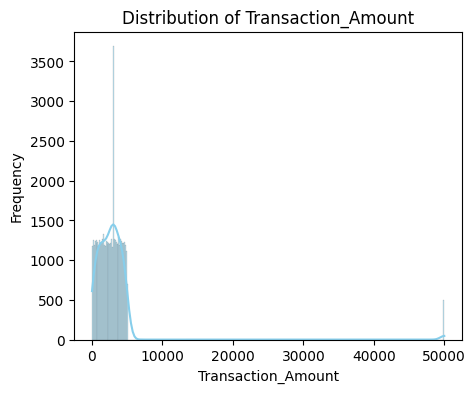

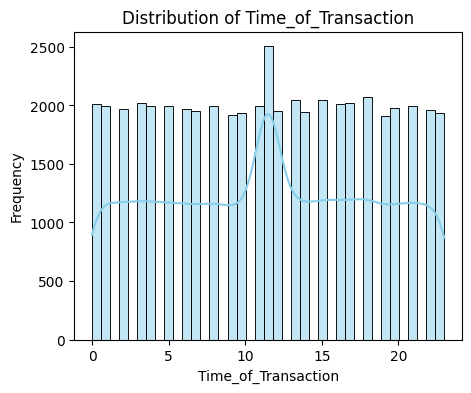

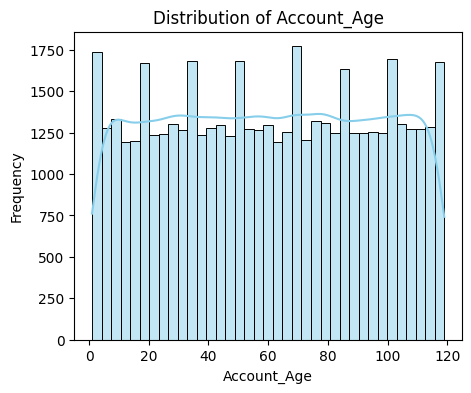

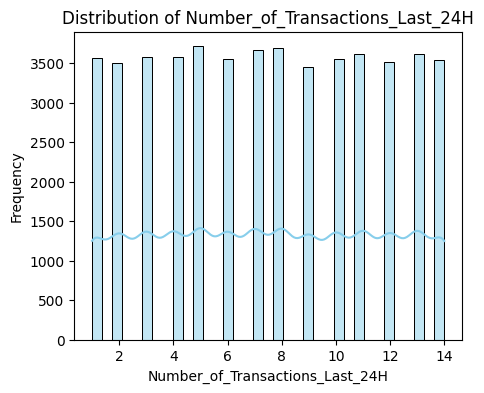

In [55]:
# Distribution of numerical columns
num_cols = ['Transaction_Amount', 'Time_of_Transaction', 'Account_Age', 'Number_of_Transactions_Last_24H']

# Visualize the distribution of each numerical column to understand their spread and detect potential outliers
for col in num_cols:
    plt.figure(figsize=(5, 4))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

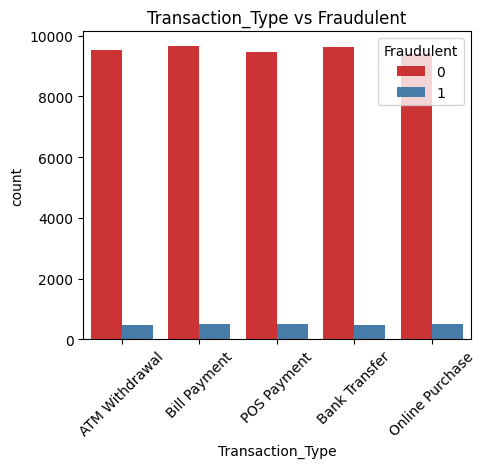

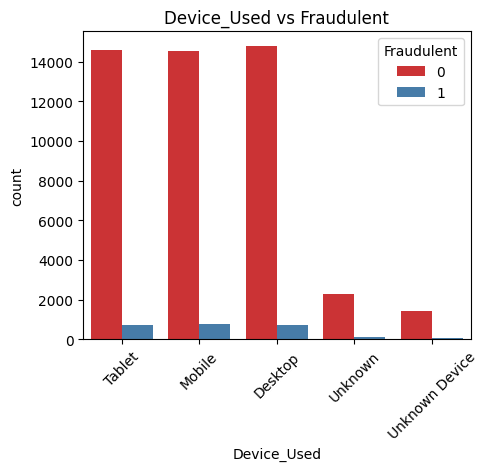

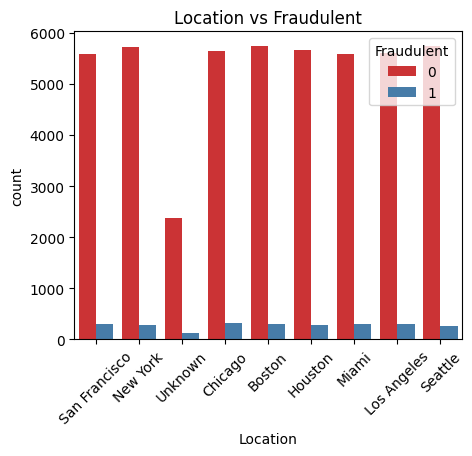

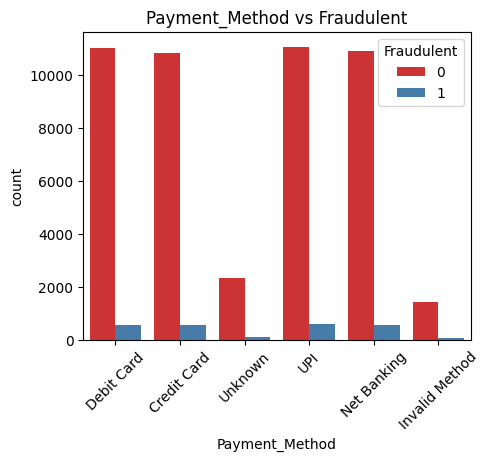

In [56]:
# Categorical columns vs Target
cat_cols = ['Transaction_Type', 'Device_Used', 'Location', 'Payment_Method']
for col in cat_cols:
    plt.figure(figsize=(5, 4))
    sns.countplot(data=df, x=col, hue='Fraudulent', palette='Set1')
    plt.title(f'{col} vs Fraudulent')
    plt.xticks(rotation=45)
    plt.show()

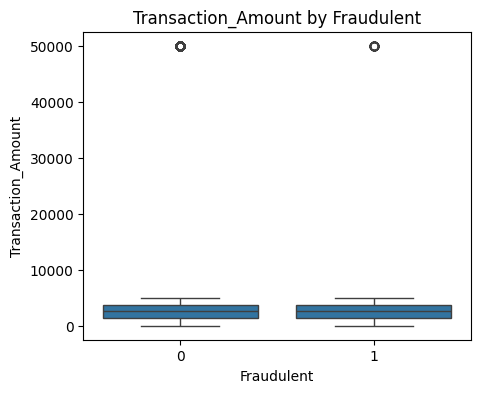

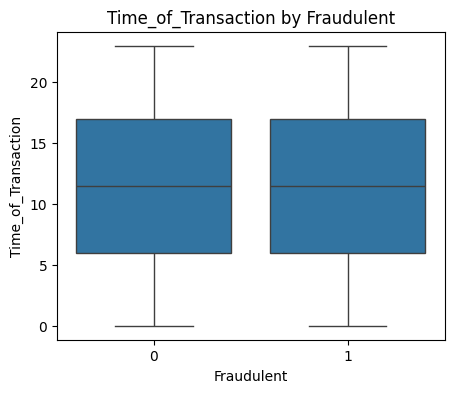

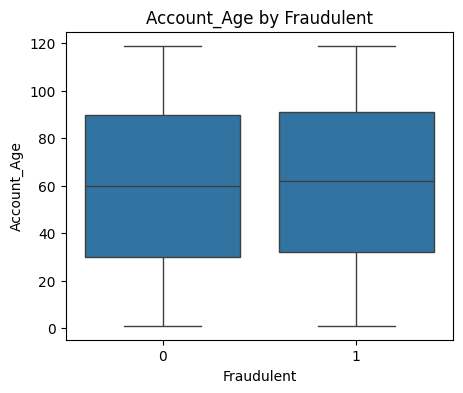

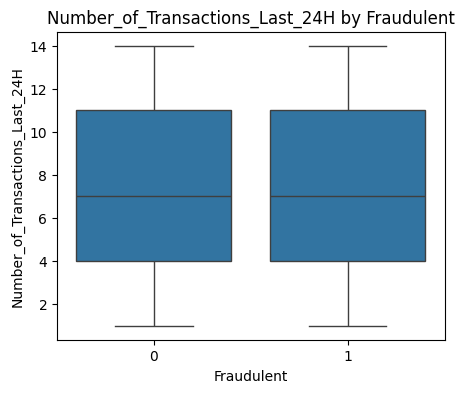

In [57]:
# Numerical columns vs Target
for col in num_cols:
    plt.figure(figsize=(5, 4))
    sns.boxplot(data=df, x='Fraudulent', y=col)
    plt.title(f'{col} by Fraudulent')
    plt.show()

## 5. Feature Engineering

In [58]:
# Create new features
def create_features(df):
    # Time-based features
    df['Hour'] = df['Time_of_Transaction'] % 24
    df['Is_Night'] = ((df['Hour'] < 6) | (df['Hour'] > 20)).astype(int)
    df['Weekend'] = ((df['Time_of_Transaction'] // 24) % 7 >= 5).astype(int)
    
    # Transaction velocity features
    df['Amount_per_Transaction'] = df['Transaction_Amount'] / (df['Number_of_Transactions_Last_24H'] + 1)
    df['Transaction_Velocity'] = df['Number_of_Transactions_Last_24H'] / (df['Account_Age'] + 1)
    
    # Behavioral features
    df['Amount_Deviation'] = (df['Transaction_Amount'] - df['Transaction_Amount'].mean()) / df['Transaction_Amount'].std()
    df['Transaction_Frequency'] = df['Number_of_Transactions_Last_24H'] / 24
    
    # Risk scoring
    df['Risk_Score'] = (df['Previous_Fraudulent_Transactions'] * 
                       np.log1p(df['Transaction_Amount']) * 
                       (1 + df['Transaction_Velocity']))
    
    # Interaction features
    df['Amount_Location_Interaction'] = df['Transaction_Amount'] * (df['Location'] == 'International').astype(int)
    
    # Percentile features
    df['Amount_Percentile'] = df['Transaction_Amount'].rank(pct=True)
    df['24H_Transactions_Percentile'] = df['Number_of_Transactions_Last_24H'].rank(pct=True)
    
    return df

df = create_features(df)

## 6. preprocessing 


In [59]:
# Create copies of the dataframe
df_eda = df.copy()
df_train = df.copy()

# Define numeric and categorical features
numeric_features = ['Transaction_Amount', 'Time_of_Transaction', 'Account_Age', 
                   'Number_of_Transactions_Last_24H', 'Amount_per_Transaction',
                   'Transaction_Velocity', 'Amount_Deviation', 'Risk_Score',
                   'Amount_Location_Interaction', 'Amount_Percentile',
                   '24H_Transactions_Percentile']

categorical_features = ['Transaction_Type', 'Device_Used', 'Location', 
                       'Payment_Method', 'Hour', 'Is_Night', 'Weekend']

# Apply LabelEncoder for EDA
le = LabelEncoder()
for col in categorical_features:
    df_eda[col] = le.fit_transform(df_eda[col])

# Apply one-hot encoding for training data
df_train = pd.get_dummies(df_train, columns=categorical_features)

# Numeric preprocessing pipeline
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', PowerTransformer(method='yeo-johnson')),
    ('outlier', FunctionTransformer(lambda x: np.clip(x, x.quantile(0.01), x.quantile(0.99))))
])

# Preprocessor for modeling
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features)
])

In [60]:
# Time-based cross-validation
from datetime import datetime
from sklearn.model_selection import TimeSeriesSplit
# Sort by time (assuming data is chronological)
df = df.sort_values('Time_of_Transaction')

# Time-based cross-validation
tscv = TimeSeriesSplit(n_splits=5) 


### 7. Feature Importance

In [61]:
# Calculate mutual information scores
mi_scores = mutual_info_classif(df_train.drop(['Fraudulent'], axis=1), df_train['Fraudulent'])
print(mi_scores)

[0.00000000e+00 0.00000000e+00 2.38625858e-03 0.00000000e+00
 8.82639488e-04 2.91085413e-04 6.33872342e-04 0.00000000e+00
 3.48632545e-04 1.33453130e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.62355430e-03 5.09811662e-04 2.86052390e-03
 1.85989538e-03 1.23510141e-04 4.10955815e-03 2.53250205e-03
 2.86708289e-03 4.32835118e-04 7.31379864e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.91277171e-04 1.89721411e-03
 2.46734054e-03 1.92429876e-03 0.00000000e+00 1.37155285e-03
 1.17918690e-03 5.77785673e-04 1.41176599e-03 4.32550697e-05
 0.00000000e+00 0.00000000e+00 4.55779490e-05 0.00000000e+00
 4.20407180e-05 0.00000000e+00 6.39209412e-04 6.72463344e-04
 6.50679054e-04 3.01652830e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 6.34422059e-04 0.00000000e+00
 0.00000000e+00 1.02387871e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.13937070e-03 0.00000000e+00
 1.01124844e-03 6.65019497e-05 1.41241860e-03 1.04228659e-02
 2.24604766e-03 1.206483

In [62]:
# Identify important features
important_features = df_train.drop(['Fraudulent'], axis=1).columns[mi_scores > 0]
important_features

Index(['Previous_Fraudulent_Transactions', 'Number_of_Transactions_Last_24H',
       'Amount_per_Transaction', 'Transaction_Velocity',
       'Transaction_Frequency', 'Risk_Score',
       'Transaction_Type_ATM Withdrawal', 'Transaction_Type_Bank Transfer',
       'Transaction_Type_Bill Payment', 'Transaction_Type_Online Purchase',
       'Transaction_Type_POS Payment', 'Device_Used_Desktop',
       'Device_Used_Mobile', 'Device_Used_Tablet', 'Device_Used_Unknown',
       'Device_Used_Unknown Device', 'Location_Los Angeles', 'Location_Miami',
       'Location_New York', 'Location_San Francisco', 'Location_Unknown',
       'Payment_Method_Credit Card', 'Payment_Method_Debit Card',
       'Payment_Method_Invalid Method', 'Payment_Method_Net Banking',
       'Hour_0.0', 'Hour_2.0', 'Hour_4.0', 'Hour_5.0', 'Hour_6.0', 'Hour_7.0',
       'Hour_11.488574788927627', 'Hour_14.0', 'Hour_19.0', 'Hour_21.0',
       'Hour_22.0', 'Hour_23.0', 'Is_Night_0', 'Is_Night_1', 'Weekend_0'],
      dtype='ob

## 8. Model Training and Evaluation

In [63]:
# Prepare data for modeling
# Apply SMOTE and scaling
scaler = StandardScaler()
X = df_train.drop('Fraudulent', axis=1)
y = df_train['Fraudulent']

X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X, y)
X_scaled = scaler.fit_transform(X_resampled)

In [64]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [65]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [66]:
# Define machine learning models
models = {
    "Logistic Regression": LogisticRegression(C=1.0, solver="liblinear", max_iter=500, class_weight="balanced"),
    "Random Forest": RandomForestClassifier(n_estimators=300, max_depth=12, min_samples_split=5, 
                                          class_weight="balanced_subsample", random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, min_samples_split=10, criterion="gini", 
                                          class_weight="balanced", random_state=42),
    "XGBoost": XGBClassifier(n_estimators=500, learning_rate=0.03, max_depth=7, 
                            scale_pos_weight=5, subsample=0.8, colsample_bytree=0.8, 
                            eval_metric="logloss", use_label_encoder=False),
    "LightGBM": LGBMClassifier(n_estimators=500, learning_rate=0.03, max_depth=7, 
                              num_leaves=60, min_data_in_leaf=5, force_col_wise=True, 
                              scale_pos_weight=5, verbose=-1),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=500, learning_rate=0.03, 
                                                  max_depth=7, min_samples_split=5),
    "SGD Classifier": SGDClassifier(loss="log_loss", penalty="l2", alpha=0.0001, 
                                   max_iter=2000, tol=1e-4, class_weight="balanced"),
}


Training Logistic Regression...


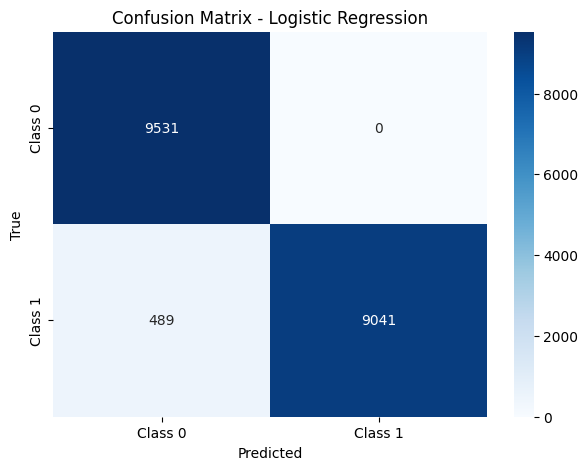


Training Random Forest...


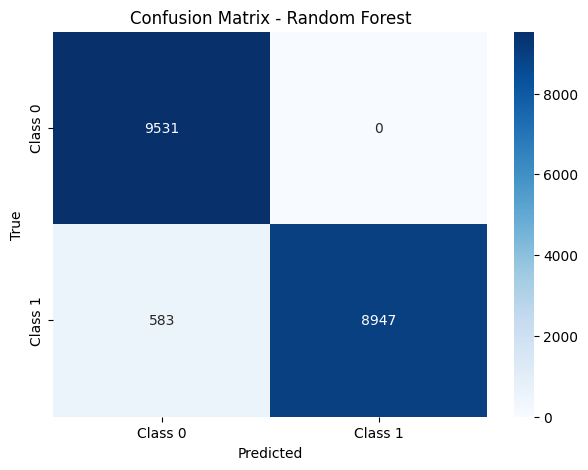


Training Decision Tree...


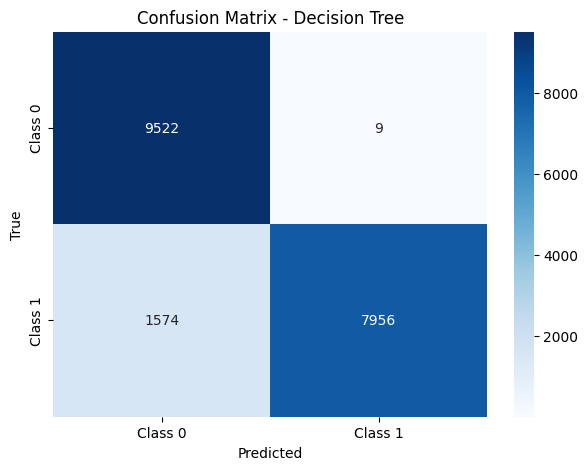


Training XGBoost...


c:\Users\shere\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:47:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


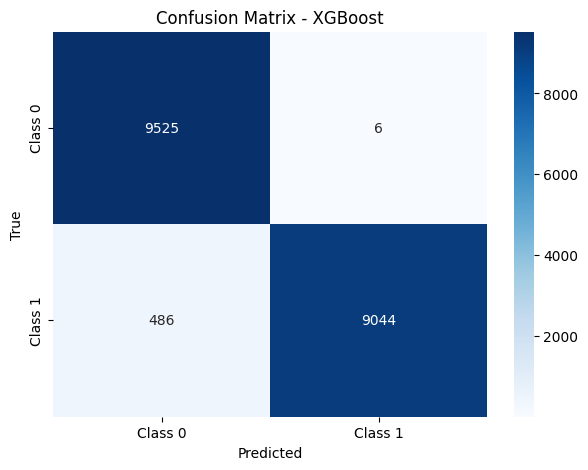


Training LightGBM...


c:\Users\shere\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


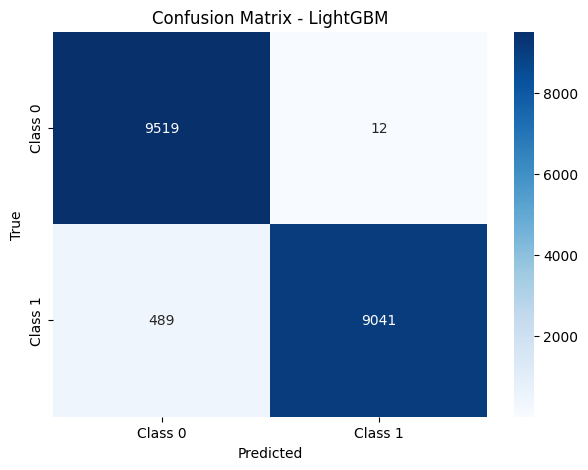


Training Gradient Boosting...


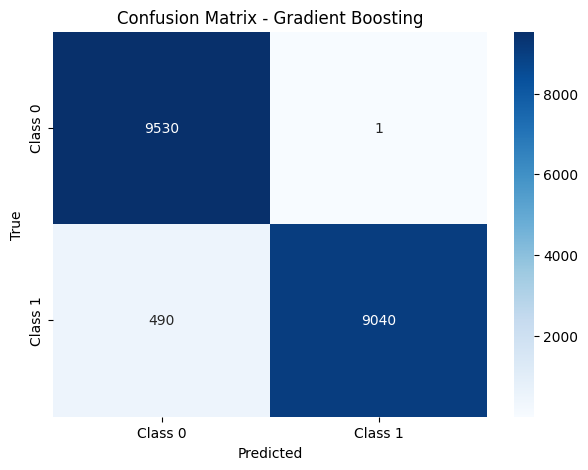


Training SGD Classifier...


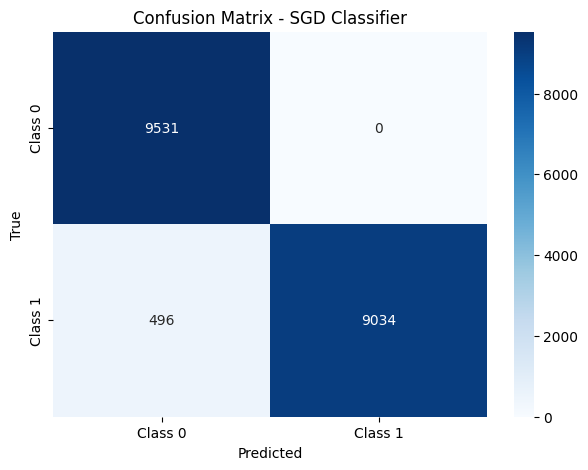

In [67]:
# Train and evaluate models
results = []
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    roc_auc = roc_auc_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    # Append results for comparison
    results.append({
        "Model": name, 
        "Accuracy": accuracy, 
        "F1 Score": f1, 
        "ROC AUC": roc_auc,
        "Precision": precision,
        "Recall": recall
    })

    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred, name)

In [68]:
# Display model performance
results_df = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False)
print("\nModel Performance Comparison:")
print(results_df)


Model Performance Comparison:
                 Model  Accuracy  F1 Score   ROC AUC  Precision    Recall
0  Logistic Regression  0.974346  0.974329  0.974344   1.000000  0.948688
5    Gradient Boosting  0.974241  0.974224  0.974239   0.999889  0.948583
3              XGBoost  0.974188  0.974172  0.974187   0.999337  0.949003
6       SGD Classifier  0.973978  0.973961  0.973977   1.000000  0.947954
4             LightGBM  0.973716  0.973699  0.973715   0.998674  0.948688
1        Random Forest  0.969414  0.969385  0.969412   1.000000  0.938825
2        Decision Tree  0.916951  0.916387  0.916947   0.998870  0.834837


## 9. Hyperparameter Tuning and save model
Optimize the model's hyperparameters to improve performance using GridSearchCV save model .

In [69]:

# Define parameter grid for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1.0, 10],        # Regularization strength
    'solver': ['liblinear', 'lbfgs'],   # Solvers (liblinear works well for small datasets)
    'class_weight': [None, 'balanced'], # Handle class imbalance
    'max_iter': [100, 500, 1000]       # Max iterations for convergence
}

# Perform GridSearchCV with memory optimization
grid_search = GridSearchCV(
    estimator=LogisticRegression(random_state=42),
    param_grid=param_grid,
    scoring='f1',                      # Optimize for F1-score (good for imbalanced data)
    cv=5,                              # 5-fold cross-validation
    n_jobs=-1,                         # Use all CPU cores
    verbose=1                          # Show progress
)

print("Starting GridSearchCV...")
grid_search.fit(X_train, y_train)

# Display best parameters
print("\nBest Parameters:", grid_search.best_params_)

# Train the final model with best parameters
final_model = grid_search.best_estimator_

# Evaluate final model
y_pred_final = final_model.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred_final)
final_f1 = f1_score(y_test, y_pred_final)

print(f"\nFinal Logistic Regression Model Performance:")
print(f"Accuracy: {final_accuracy:.4f}")
print(f"F1 Score: {final_f1:.4f}")

# Save the final model
model_filename = 'fraud_detection_logreg_model.pkl'
joblib.dump(final_model, model_filename)

print("\nFinal Logistic Regression model saved:")
print(f"- {model_filename}")


Starting GridSearchCV...
Fitting 5 folds for each of 48 candidates, totalling 240 fits

Best Parameters: {'C': 1.0, 'class_weight': None, 'max_iter': 100, 'solver': 'liblinear'}

Final Logistic Regression Model Performance:
Accuracy: 0.9743
F1 Score: 0.9737

Final Logistic Regression model saved:
- fraud_detection_logreg_model.pkl


In [70]:
# Add these lines after your model training code
joblib.dump(final_model, 'fraud_detection_logreg_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(list(df_train.columns), 'expected_columns.pkl')  # Save feature names

['expected_columns.pkl']

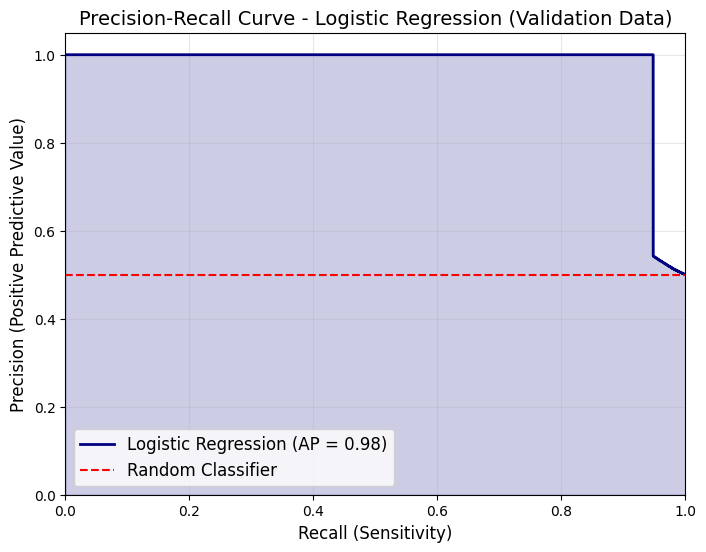

Average Precision: 0.975
Baseline (Random Classifier AP): 0.500


In [71]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_predict

# 1. Get predicted probabilities using cross-validation
# (This avoids data leakage and gives us a proper validation set performance)
lr = LogisticRegression(C=1.0, penalty='l2', solver='liblinear', random_state=42)
y_scores = cross_val_predict(lr, X_resampled, y_resampled, cv=5, method='predict_proba')[:, 1]

# 2. Calculate precision-recall curve metrics
precision, recall, thresholds = precision_recall_curve(y_resampled, y_scores)
average_precision = average_precision_score(y_resampled, y_scores)

# 3. Plot the PR curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, lw=2, color='navy', 
         label=f'Logistic Regression (AP = {average_precision:.2f})')
plt.fill_between(recall, precision, alpha=0.2, color='navy')

# Add reference line for random classifier
plt.plot([0, 1], [y_resampled.mean(), y_resampled.mean()], 
         linestyle='--', color='red', label='Random Classifier')

plt.xlabel('Recall (Sensitivity)', fontsize=12)
plt.ylabel('Precision (Positive Predictive Value)', fontsize=12)
plt.title('Precision-Recall Curve - Logistic Regression (Validation Data)', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

# 4. Print key metrics
print(f"Average Precision: {average_precision:.3f}")
print(f"Baseline (Random Classifier AP): {y_resampled.mean():.3f}")

## 10. Deployment Process
After training and evaluating the model, the next step is to deploy it. Deployment involves saving the model and creating an interface for users to interact with it. This can be done using tools like Streamlit or Flask.

In [74]:
# Deploy the model using Streamlit
!streamlit run app1.py

^C
